In [1]:
# import statements
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# import MechDesign Helpers
import rm_python_lib.MechDesign.Helpers as HM

from rm_python_lib.MechDesign.Units.Units import m_, mm_, kg_, s_, N_, rpm_, W_, deg_
import rm_python_lib.MechDesign.Units.UnitMethods as UM

import rm_python_lib.MechDesign.RnM as RnM

### 1. Calculate Nominal Torque using Team Specific Data and Motor Size Selected 


$$P_{M,required} = 5500.0W$$

$$K_A = 1.638$$



In [2]:
# new shaft connection object
SC = RnM.ShaftConnection() 

# constants
motor_speed = 1500*rpm_
P_motor = 5500*W_
SC.K_A = 1.638

# convert motor speed
n_M = (1500 / 60)

# calculate Nominal Torque
SC.T_nom = P_motor / (2 * np.pi * n_M)
SC.T_eq = SC.T_nom * SC.K_A
HM.EqPrint("T_nom",SC.T_nom * N_*m_ / W_)
# SC.T_eq = SC.E12_1_hC_DynamicLoadTorque()
HM.EqPrint("T_eq",SC.T_eq * N_*m_ / W_)


Eq(T_nom, 35.01*N_*m_)

Eq(T_eq, 57.35*N_*m_)

Eq(T_eq, 57.35*N_*m_)

### 2. Tangential Force Ft,nom
Tangential force at contact surface of motor shaft with dynamic load
$$F_{t,nom} = {2T_{nom}}/{d}$$

$$F_t = K_A * F_{t,nom}$$

Our selected motor size = 132s is 38mm (from Table 16-21)

In [3]:
SC.d = 38
F_t_nom = (2 * SC.T_nom) / (SC.d / 1000)
F_t = SC.K_A * F_t_nom
HM.EqPrint("F_t,nom",F_t_nom / W_ * N_)
HM.EqPrint("F_t",F_t /W_ * N_)

Eq(F_t,nom, 1843.0*N_)

Eq(F_t, 3019.0*N_)

Eq(F_t, 3019.0*N_)

### 3. Calculate average pressure p_gem as a function of key length l

Standardized Key for motor shaft 132 38mm from Table 12-2a:
- Width b = 10mm
- Height h = 8mm

Key length range limits:
- l > b=10mm
- l_max is based on l' <= 1.3*d

Using TB1-1, C45E  
ReNKey = 490 N/mm^2

$$R_{e, key} = K_t * R_{eN}$$

Ductile Material (Steel shaft and key):
<br>
Safety factor against plastic deformation 
$$S_F = 1.5$$

$$\bar{p} = R_{e, key} / S_F$$



In [4]:
# constants based on Motor Selection
SC.phi = 1 # 1key
SC.n = 1 # 1 key
SC.K_lambda = 1 # method C

SC.K_t = 0.92
SC.b = 10
SC.h = 8
S_F = 1.5

# Motor Shaft
ReN_shaft = 490
Re_shaft = ReN_shaft * SC.K_t
HM.EqPrint('R_eShaft',Re_shaft)

# Key Yield Strength
ReN_key = 490
Re_key = ReN_key * SC.K_t
HM.EqPrint('R_eKey',Re_key)

# Hub
RmN_hub = 450
Kt_hub = 1
Rm_hub = RmN_hub * Kt_hub
HM.EqPrint('R_mHub',Rm_hub)

p_bar = Re_key / S_F

# S = min(UM.RemoveUnits(Re_shaft),UM.RemoveUnits(Re_key),UM.RemoveUnits(Rm_hub))*N_/mm_**2 / SC.p_gem
# t=HM.EqPrint('S',S)

# Key Length Range
# l_min = SC.b + 1.0
# l_max = 1.3 * SC.d
# l = np.linspace(l_min, l_max, 100)

SC.lprime = SC.l - SC.b

SC.hprime = SC.h * 0.45

T_eq_Nmm = UM.RemoveUnits(SC.T_eq * 1000)
# print(T_eq_Nmm)

# p_gem as a function of l
SC.p_gem = (2 * T_eq_Nmm * SC.K_lambda) / (SC.d * SC.hprime * SC.lprime * SC.n * SC.phi)
# print(p_gem)
HM.EqPrint('p_gem',SC.p_gem)


# Safety factor S
S = p_bar / SC.p_gem
HM.EqPrint('S',S)
# print(S)


Eq(R_eShaft, 450.8)

Eq(R_eKey, 450.8)

Eq(R_mHub, 450)

Eq(p_gem, 114700.0/(136.8*_l - 1368.0))

Eq(S, 0.3584*_l - 3.584)

Eq(S, 0.3584*_l - 3.584)

### 3. Plot Graphs

$$L_{limit} = 1.3*d + b$$

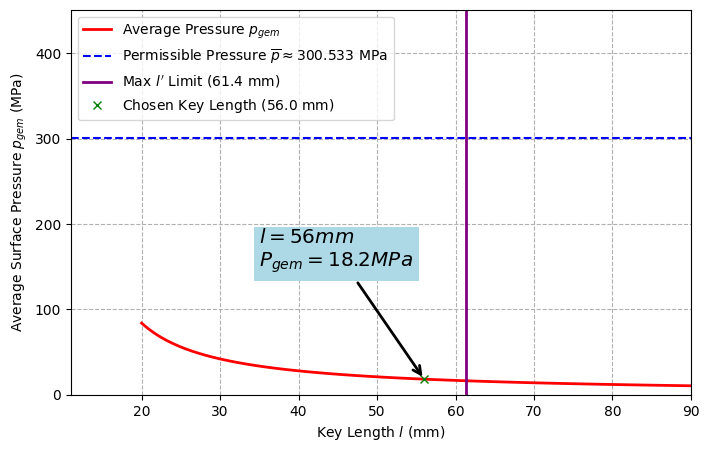

In [ ]:
# Key Length Range
l_min = SC.b + 1.0
l_max = 1.3 * SC.d
l_limit = 61.4
x = np.linspace(20, 100, 100)
# SC.lprime = SC.l - SC.b
# # p_gem as a function of l
y = 114700.0 / (136.8 * x - 1368.0)
# print(SC.l)
# print(SC.p_gem)

# key length
chosen_length = 56
chosen_pressure = 114700.0 / (136.8 * chosen_length - 1368.0)

plt.figure(figsize=(8,5))
plt.plot(x,y,label=r'Average Pressure $p_{gem}$', color='red', linewidth=2)
textsize = 'x-large'
plt.axhline(p_bar, color='blue', linestyle='--', 
            label=r'Permissible Pressure $\overline{{p}} \approx 300.533$ MPa')
plt.axvline(l_limit, color='purple', linestyle='-', 
            label=f"Max $l'$ Limit ($61.4$ mm)", linewidth=2)
plt.xlabel(r'Key Length $l$ (mm)')
plt.ylabel(r'Average Surface Pressure $p_{gem}$ (MPa)')
# plt.title(f'Key Pressure vs. Length for Motor Pulley ($T_{{eq}}={T_eq:.1f}$ Nm)')
#show surface pressure with choosen key length
x_index = 56
length_specific = x_index
y_intersect = 114700.0 / (136.8 * x_index - 1368.0)
plt.annotate(f'$l = {length_specific}mm$ \n$P_{{gem}}= {y_intersect:.1f} MPa$'
             ,xy=(length_specific,y_intersect),xytext=(35,150),size=textsize
             ,arrowprops=dict(arrowstyle='->', color='black', linewidth=2)
             ,bbox=dict(facecolor='lightblue',edgecolor='none'))

plt.grid(True, which='both', linestyle='--')
plt.ylim(0, p_bar * 1.5) 
plt.xlim(l_min, 90)
plt.plot(chosen_length, chosen_pressure, 'x', color='green', label=f'Chosen Key Length ($56.0$ mm)')

plt.legend()

plt.show()

In [6]:
l_final = 40
S =0.3584 * l_final - 3.584
HM.EqPrint('S',S)

Eq(S, 10.75)

Eq(S, 10.75)